In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/htc/Downloads/Loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [6]:
# Here 3+ causing the issue. we will convert this feature into an int.

In [7]:
data = data.drop(columns = 'Loan_ID')

In [8]:
# Find some relation between features and loan status

In [9]:
data.describe() # we see some nan values.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.describe(include = 'object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [11]:
# Missing Values

In [12]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# Taking a catchold of categorical data

In [14]:
cat_cols = data.dtypes=='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [15]:
num_cols = data.dtypes != 'object'
num_cols = list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [16]:
cat_cols.remove('Loan_Status') # Loan Status is target, so removed from features

In [17]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

# Univariate Analysis

In [18]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

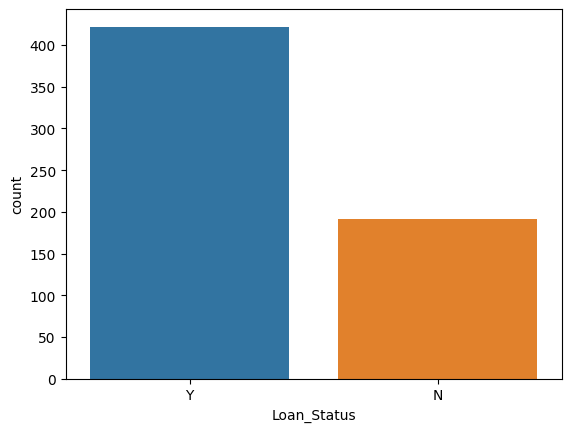

In [19]:
sns.countplot(data = data , x = 'Loan_Status')

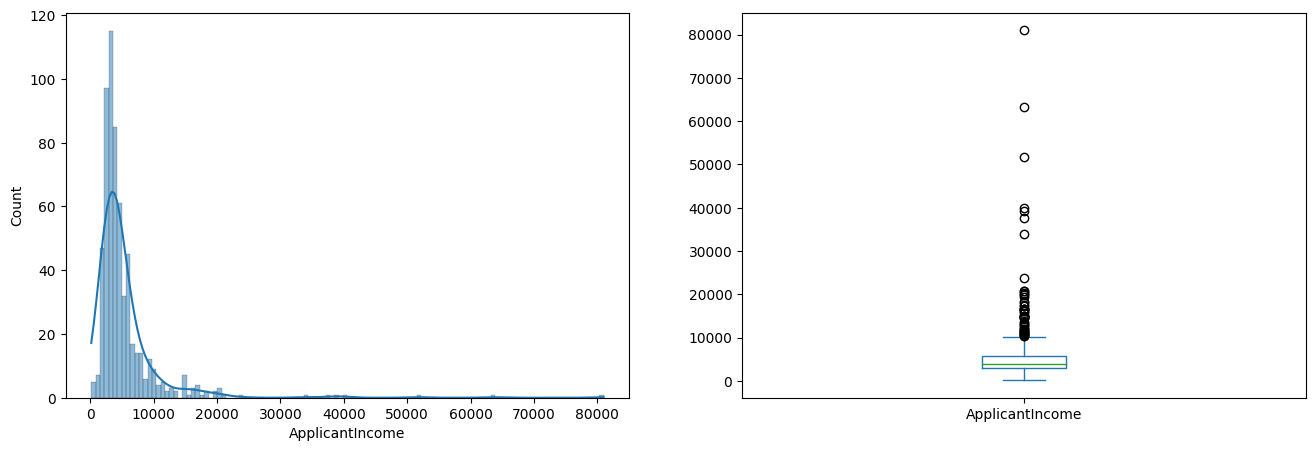

In [20]:
plt.subplot(121)
sns.histplot(data['ApplicantIncome'],kde = True)

plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [21]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [22]:
# It seems that average income for both Yes and No are same. But still we will check if this lil' difference is statistically significant?

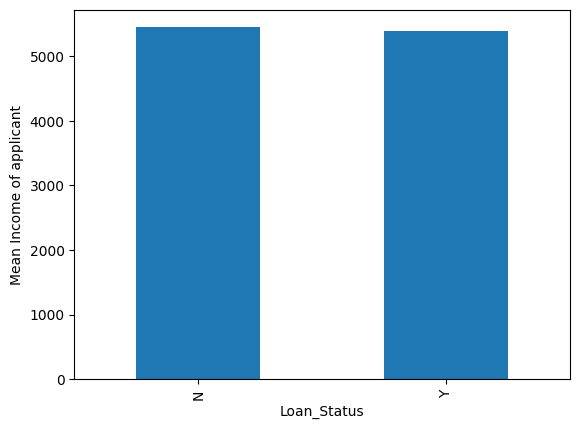

In [23]:
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.ylabel('Mean Income of applicant')
plt.show()

# Clearly difference is negligible

In [24]:
Loan_status_Y_Income = data.loc[data['Loan_Status']=='Y'][['ApplicantIncome']]

In [25]:
Loan_status_N_Income = data.loc[data['Loan_Status']=='N'][['ApplicantIncome']]

In [26]:
# H0: ApplicantIncome and LoanStatus are not related
# Ha: They are related

In [27]:
from scipy.stats import ttest_ind

In [28]:
t_stat,p_value = ttest_ind(Loan_status_Y_Income,Loan_status_N_Income,alternative = 'less')

In [29]:
p_value

array([0.45364391])

In [30]:
# Since p_value is high, we are failed to reject the H0
# They are not related here

## Bin Income 

In [31]:
# Converting categorical into numerical

In [32]:
bins = [0,2500,4000,6000,8000,10000,20000,40000,81000]
group = ['low','average','medium','h1','h2','h3','h4','very high']

In [33]:
data['Income_bin'] = pd.cut(data['ApplicantIncome'],bins,labels = group)

In [34]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


In [35]:
pd.crosstab(data['Income_bin'],data['Loan_Status'])

Loan_Status,N,Y
Income_bin,,
low,34,74
average,67,159
medium,45,98
h1,20,34
h2,9,22
h3,13,27
h4,3,6
very high,1,2


In [36]:
from scipy.stats import chi2_contingency

In [37]:
vals = pd.crosstab(data['Income_bin'],data['Loan_Status'])

In [38]:
chi2_contingency(vals)

Chi2ContingencyResult(statistic=1.2420001711303135, pvalue=0.9899274842922701, dof=7, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 12.50814332,  27.49185668],
       [  2.81433225,   6.18566775],
       [  0.93811075,   2.06188925]]))

In [39]:
# Since p_value is very high. we are failed to reject the H0 here as well
# They are not related

In [40]:
# Let's do it visually
Income_bin = pd.crosstab(data['Income_bin'],data['Loan_Status'])

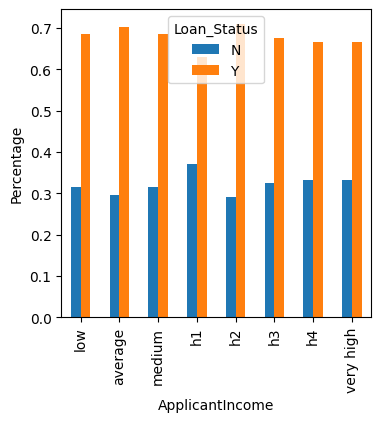

In [41]:
Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind='bar',figsize = (4,4))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

In [42]:
# This is counter intutive we thought the higher the income is, the more the chance is that we get loan. But that is clearly not the case here

In [43]:
# Let's create a new feature

In [44]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [45]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,average,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,6000.0


In [46]:
# Maybe Loan is depend upon total Income

In [47]:
bins = [0,3000,5000,8000,81000]
group = ['low','average','high','very high']

In [48]:
data['Total_Income_bin'] = pd.cut(data['Total_Income'],bins,labels = group)

In [49]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,5849.0,high
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,6091.0,high
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,average,3000.0,low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,average,4941.0,average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,6000.0,high


In [50]:
pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])

Loan_Status,N,Y
Total_Income_bin,,
low,20,27
average,69,154
high,61,151
very high,42,90


In [51]:
# Is this difference statistically significant?
vals = pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])

In [52]:
chi2_contingency(vals)

Chi2ContingencyResult(statistic=3.428480885250809, pvalue=0.3301570564076713, dof=3, expected_freq=array([[ 14.6970684 ,  32.3029316 ],
       [ 69.73289902, 153.26710098],
       [ 66.29315961, 145.70684039],
       [ 41.27687296,  90.72312704]]))

In [53]:
# p_value is high. That means they are still not related somehow

In [54]:
# Let's do some analysis based on loan amount terms

In [55]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [56]:
# Let's take loan amount terms in years instead of months

data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')

In [57]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,high
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,high
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,average,3000.0,low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,average,4941.0,average
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,high


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

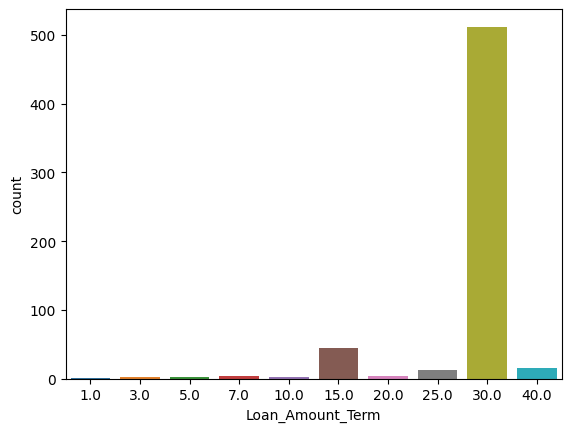

In [58]:
sns.countplot(data = data , x = 'Loan_Amount_Term')

In [59]:
# Most of them took the loan for 30 years

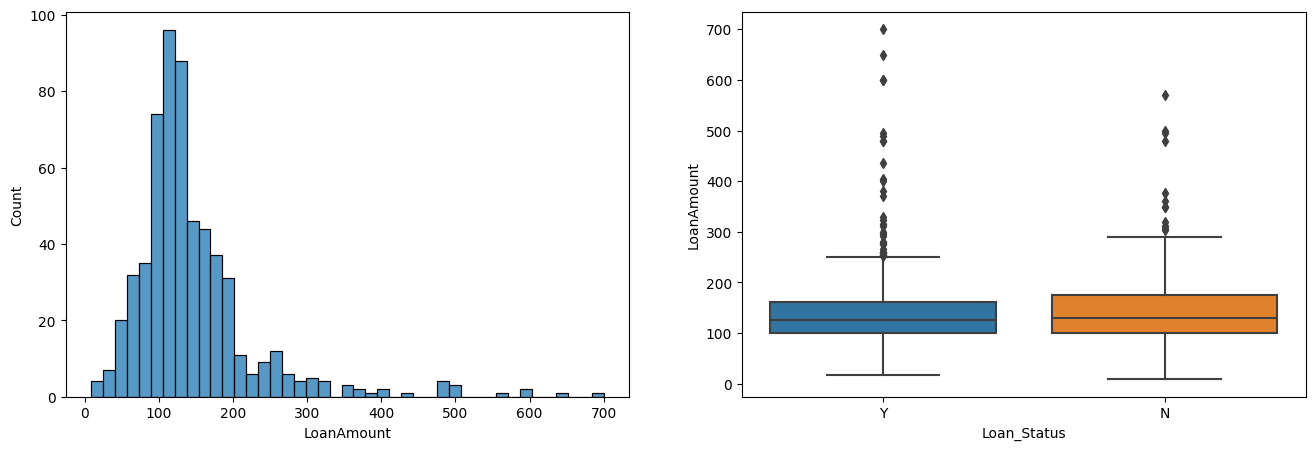

In [60]:
plt.figure(figsize = (16,5))
plt.subplot(121)
sns.histplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data = data, x = 'Loan_Status', y ='LoanAmount')
plt.show()

In [61]:
# This is another counter intuitive.
# There is no relation between loan amount and loan status

### Ability to pay EMI

In [62]:
data['Loan_Amount_per_year'] = data['LoanAmount']/data['Loan_Amount_Term']

In [63]:
data['EMI'] = data['Loan_Amount_per_year']*1000/12

In [64]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin,Loan_Amount_per_year,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,high,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,high,4.266667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,average,3000.0,low,2.200000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,average,4941.0,average,4.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,high,4.700000,391.666667


In [65]:
# Is EMI related to its income?

In [66]:
data['Able_to_pay_EMI'] = (data['Total_Income']*0.1 > data['EMI']).astype('int')

In [67]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,high,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,high,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,average,3000.0,low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,average,4941.0,average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,high,4.700000,391.666667,1


<Axes: xlabel='Able_to_pay_EMI', ylabel='count'>

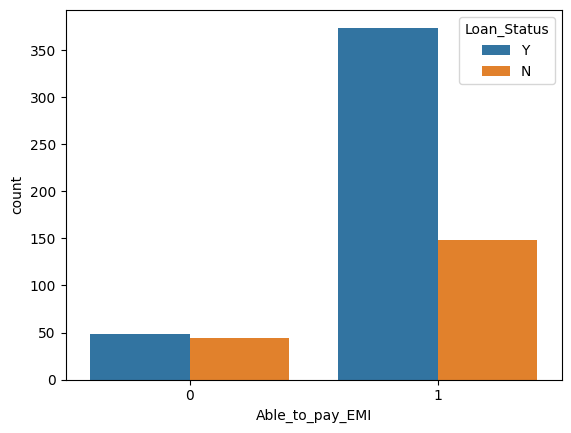

In [68]:
sns.countplot(data = data, x = 'Able_to_pay_EMI',hue = 'Loan_Status')

In [69]:
# Now this is Statistically significant.
# we created this column with a very crude information

In [70]:
vals = pd.crosstab(data['Able_to_pay_EMI'],data['Loan_Status'])

In [71]:
vals

Loan_Status,N,Y
Able_to_pay_EMI,,
0,44,48
1,148,374


In [72]:
chi2_contingency(vals)

Chi2ContingencyResult(statistic=12.909621328812786, pvalue=0.00032689742066716434, dof=1, expected_freq=array([[ 28.76872964,  63.23127036],
       [163.23127036, 358.76872964]]))

In [73]:
# since p_value is low here
# we can say this is statistically significant
# This feature is very very very related to Loan_Status

# Dependents

In [74]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [75]:
data['Dependents'].replace('3+',3,inplace=True)

In [76]:
data['Dependents'] = data['Dependents'].astype('float')

In [77]:
data.dtypes

Gender                    object
Married                   object
Dependents               float64
Education                 object
Self_Employed             object
ApplicantIncome            int64
CoapplicantIncome        float64
LoanAmount               float64
Loan_Amount_Term         float64
Credit_History           float64
Property_Area             object
Loan_Status               object
Income_bin              category
Total_Income             float64
Total_Income_bin        category
Loan_Amount_per_year     float64
EMI                      float64
Able_to_pay_EMI            int32
dtype: object

<Axes: xlabel='Dependents', ylabel='count'>

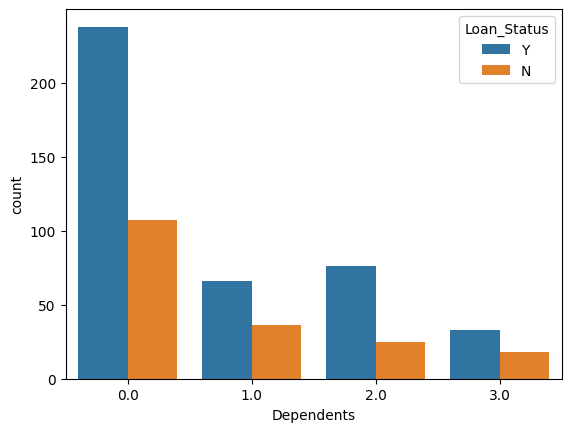

In [78]:
sns.countplot(data = data, x = 'Dependents',hue = 'Loan_Status')

### Credit History

In [79]:
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [80]:
vals = pd.crosstab(data['Credit_History'],data['Loan_Status'])

In [81]:
vals


Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [82]:

chi2_contingency(vals)

Chi2ContingencyResult(statistic=174.63729658142535, pvalue=7.184759548750746e-40, dof=1, expected_freq=array([[ 28.2464539,  60.7535461],
       [150.7535461, 324.2464539]]))

In [83]:
# This feature is very highly related to Loan Status

In [84]:
data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])

In [85]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI,NewFeature
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,high,NaN,NaN,0,NaN
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,high,4.266667,355.555556,1,11967.0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,average,3000.0,low,2.200000,183.333333,1,10198.0
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,average,4941.0,average,4.000000,333.333333,1,9943.0
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,high,4.700000,391.666667,1,13423.0


In [86]:
mean_new_feature = data['NewFeature'].mean()
mean_new_feature

11811.832412523021

In [87]:
data['Seperator'] = data['NewFeature']>0.25*mean_new_feature

In [88]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI,NewFeature,Seperator
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,high,NaN,NaN,0,NaN,False
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,high,4.266667,355.555556,1,11967.0,True
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,average,3000.0,low,2.200000,183.333333,1,10198.0,True
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,average,4941.0,average,4.000000,333.333333,1,9943.0,True
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,high,4.700000,391.666667,1,13423.0,True


In [89]:
data['Seperator'] = data['Seperator'].astype('str')

In [90]:
pd.crosstab(data['Seperator'],data['Loan_Status'])

Loan_Status,N,Y
Seperator,,
False,36,50
True,156,372


In [91]:
vals = pd.crosstab(data['Seperator'],data['Loan_Status'])

In [92]:
 chi2_contingency(vals)

Chi2ContingencyResult(statistic=4.661356306711547, pvalue=0.030848813937153836, dof=1, expected_freq=array([[ 26.89250814,  59.10749186],
       [165.10749186, 362.89250814]]))

In [93]:
# since p_value is small we can say these two features are related

In [94]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI,NewFeature,Seperator
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,high,NaN,NaN,0,NaN,False
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,high,4.266667,355.555556,1,11967.0,True
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,average,3000.0,low,2.200000,183.333333,1,10198.0,True
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,average,4941.0,average,4.000000,333.333333,1,9943.0,True
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,high,4.700000,391.666667,1,13423.0,True


In [95]:
married_income = data.loc[data['Married']=='Yes'][['ApplicantIncome']]


In [96]:
Unmarried_income = data.loc[data['Married']=='No'][['ApplicantIncome']]

In [97]:
married_income.mean()

ApplicantIncome    5629.173367
dtype: float64

In [98]:
Unmarried_income.mean()

ApplicantIncome    4970.384977
dtype: float64

In [99]:
# Is this difference statistically significant?


In [100]:
ttest_ind(married_income,Unmarried_income,alternative = 'greater')

TtestResult(statistic=array([1.26843341]), pvalue=array([0.10256393]), df=array([609.]))

In [101]:
# since p_value is 10% . we can say they are not related

# Missing Values Treatment

In [104]:
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [105]:
# It will be very unfair if we decide to drop the 50 rows directly.
# It will be very unfair to use the most frequent value here.
# So we will just give it an another no. 2

In [106]:
data['Credit_History'] = data['Credit_History'].fillna(2)

In [107]:
# Similarly with Self_Employed feature

In [108]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [109]:
data['Self_Employed'] = data['Self_Employed'].fillna('Other')

# Some Imputation Techniques

In [111]:
from sklearn.impute import SimpleImputer

### Numerical columns

In [112]:
num_cols = data.dtypes != 'object'
num_cols = list(num_cols[num_cols].index)
num_cols

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Income_bin',
 'Total_Income',
 'Total_Income_bin',
 'Loan_Amount_per_year',
 'EMI',
 'Able_to_pay_EMI',
 'NewFeature']

In [113]:
data.isna().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History           0
Property_Area            0
Loan_Status              0
Income_bin               0
Total_Income             0
Total_Income_bin         0
Loan_Amount_per_year    36
EMI                     36
Able_to_pay_EMI          0
NewFeature              71
Seperator                0
dtype: int64

In [116]:
num_missing = ['EMI','Loan_Amount_per_year','LoanAmount','Loan_Amount_Term']

In [117]:
median_imputer = SimpleImputer(strategy = 'median')

for col in num_missing:
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

### For categorical columns

In [119]:
cat_missing = ['Gender','Married','Dependents']

freq_imputer = SimpleImputer(strategy = 'most_frequent')

for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [126]:
data.isna().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
Income_bin               0
Total_Income             0
Total_Income_bin         0
Loan_Amount_per_year     0
EMI                      0
Able_to_pay_EMI          0
NewFeature              71
Seperator                0
dtype: int64

## Categoric to Numeric

In [123]:
s = data.dtypes == 'object'
object_cols= list(s[s].index)
object_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Seperator']

### Loan_Status

In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
col = 'Loan_Status'
data[col].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [127]:
label_encoder = LabelEncoder()
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

### Gender

In [128]:
col = 'Gender'
data[col].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [129]:
label_encoder = LabelEncoder()
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

Gender
1    502
0    112
Name: count, dtype: int64

### Married

In [130]:
col = 'Married'
data[col].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [131]:
label_encoder = LabelEncoder()
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

Married
1    401
0    213
Name: count, dtype: int64

### Education

In [132]:
col = 'Education'
data[col].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [133]:
label_encoder = LabelEncoder()
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

Education
0    480
1    134
Name: count, dtype: int64

### Seperator

In [147]:
col = 'Seperator'
data[col].value_counts()

Seperator
True     528
False     86
Name: count, dtype: int64

In [148]:
label_encoder = LabelEncoder()
data[col] = label_encoder.fit_transform(data[col])
data[col].value_counts()

Seperator
1    528
0     86
Name: count, dtype: int64

### When we have more than two categories inside a feature.

In [134]:
!pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/1f/e2/495811f12b2e90753fff0e42a07adb0370a725de17cc23a579ac9d3ca67c/category_encoders-2.6.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.8 kB ? eta -:--:--
   ------------------------------ --------- 61.4/81.8 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 81.8/81.8 kB 917.8 kB/s eta 0:00:00


In [135]:
from category_encoders import TargetEncoder

### Property Area

In [136]:
col = 'Property_Area'
data[col].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [140]:
te = TargetEncoder()
data[col] = te.fit_transform(data[col],data['Loan_Status'])
data[col].value_counts()

Property_Area
0.768240    233
0.658416    202
0.614525    179
Name: count, dtype: int64

### Self_Employed


In [142]:
col = 'Self_Employed'
data[col].value_counts()

Self_Employed
No       500
Yes       82
Other     32
Name: count, dtype: int64

In [143]:
te = TargetEncoder()
data[col] = te.fit_transform(data[col],data['Loan_Status'])
data[col].value_counts()

Self_Employed
0.686000    500
0.682936     82
0.711469     32
Name: count, dtype: int64

### Income bin

In [167]:
col = 'Income_bin'
data[col].value_counts()

Income_bin
average      226
medium       143
low          108
h1            54
h3            40
h2            31
h4             9
very high      3
Name: count, dtype: int64

In [168]:
te = TargetEncoder()
data[col] = te.fit_transform(data[col],data['Loan_Status'])
data[col].value_counts()

Income_bin
0.703540    226
0.685315    143
0.685186    108
0.631492     54
0.676466     40
0.704088     31
0.682144      9
0.684110      3
Name: count, dtype: int64

### Total Income bin

In [169]:
col = 'Total_Income_bin'
data[col].value_counts()

Total_Income_bin
average      223
high         212
very high    132
low           47
Name: count, dtype: int64

In [170]:
te = TargetEncoder()
data[col] = te.fit_transform(data[col],data['Loan_Status'])
data[col].value_counts()

Total_Income_bin
0.690583    223
0.712264    212
0.681818    132
0.581573     47
Name: count, dtype: int64

In [171]:
data.dtypes

Gender                    int32
Married                   int32
Dependents              float64
Education                 int32
Self_Employed           float64
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area           float64
Loan_Status               int32
Income_bin              float64
Total_Income            float64
Total_Income_bin        float64
Loan_Amount_per_year    float64
EMI                     float64
Able_to_pay_EMI           int32
NewFeature              float64
Seperator                 int32
dtype: object

All of the features are now either int or float.

In [150]:
# Let's look at correlation of every datapoint.

<Axes: >

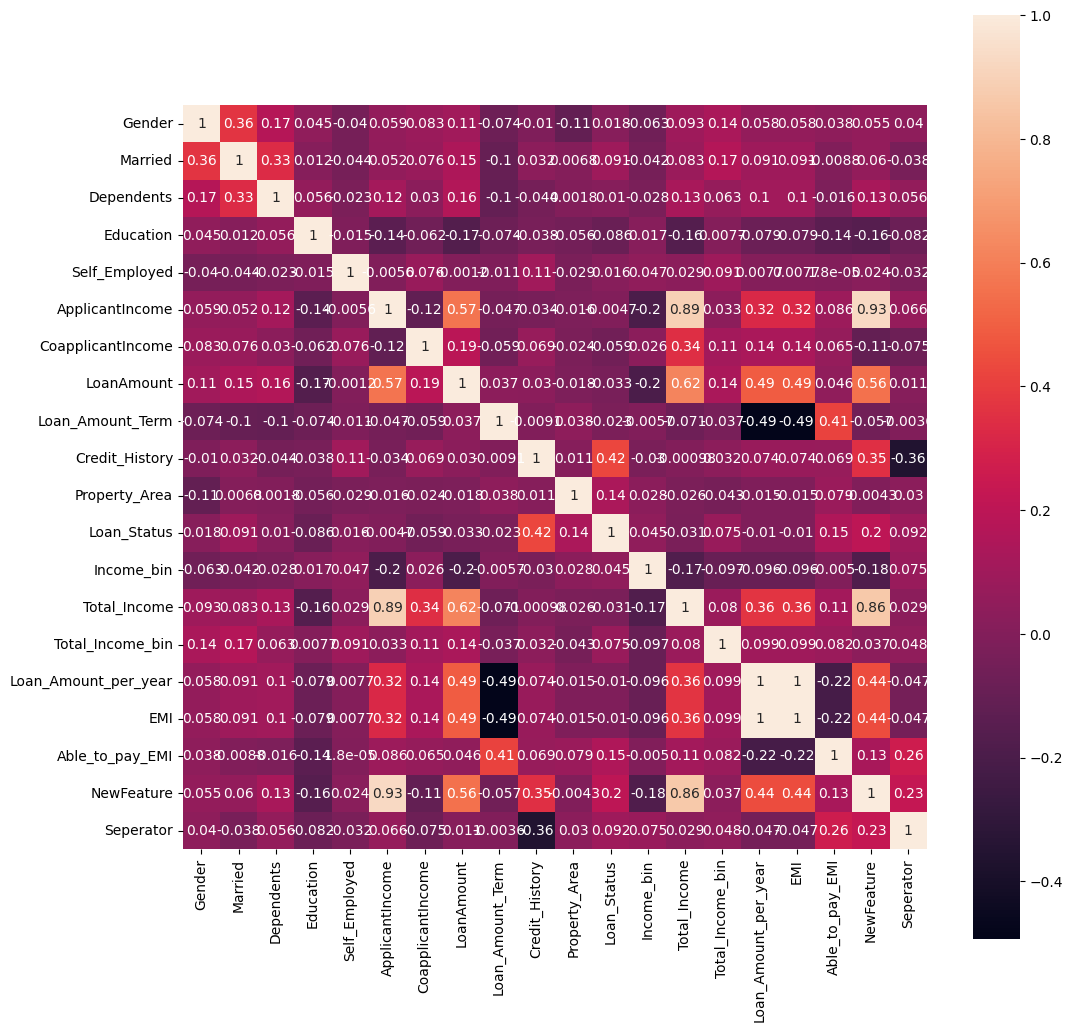

In [172]:
#PCC

plt.figure(figsize =(12,12))
sns.heatmap(data.corr(method = 'pearson'),square = True, annot = True)

# Standardization

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI,NewFeature,Seperator
0,1,0,0.0,0,0.686000,5849,0.0,128.0,30.0,1.0,0.658416,1,0.685315,5849.0,0.712264,4.383333,365.277778,0,NaN,0
1,1,1,1.0,0,0.686000,4583,1508.0,128.0,30.0,1.0,0.614525,0,0.685315,6091.0,0.712264,4.266667,355.555556,1,11967.0,1
2,1,1,0.0,0,0.682936,3000,0.0,66.0,30.0,1.0,0.658416,1,0.703540,3000.0,0.581573,2.200000,183.333333,1,10198.0,1
3,1,1,0.0,1,0.686000,2583,2358.0,120.0,30.0,1.0,0.658416,1,0.703540,4941.0,0.690583,4.000000,333.333333,1,9943.0,1
4,1,0,0.0,0,0.686000,6000,0.0,141.0,30.0,1.0,0.658416,1,0.685315,6000.0,0.712264,4.700000,391.666667,1,13423.0,1


In [175]:
# Let's standardized this data with z_scores

In [176]:
scaler = StandardScaler()
std_data = scaler.fit_transform(data)
std_data = pd.DataFrame(std_data,columns = data.columns)
std_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI,NewFeature,Seperator
0,0.472343,-1.372089,-0.737806,-0.528362,-0.156957,0.072991,-0.554487,-0.211241,0.273231,0.134703,-0.440191,0.674519,-0.114275,-0.182184,0.742878,-0.212270,-0.212270,-2.381998,NaN,-2.477808
1,0.472343,0.728816,0.253470,-0.528362,-0.156957,-0.134412,-0.038732,-0.211241,0.273231,0.134703,-1.109162,-1.482537,-0.114275,-0.144684,0.742878,-0.231329,-0.231329,0.419816,0.022464,0.403582
2,0.472343,0.728816,-0.737806,-0.528362,-0.680802,-0.393747,-0.554487,-0.948996,0.273231,0.134703,-0.440191,0.674519,0.802813,-0.623656,-3.232230,-0.568956,-0.568956,0.419816,-0.233642,0.403582
3,0.472343,0.728816,-0.737806,1.892641,-0.156957,-0.462062,0.251980,-0.306435,0.273231,0.134703,-0.440191,0.674519,0.802813,-0.322885,0.083421,-0.274894,-0.274894,0.419816,-0.270560,0.403582
4,0.472343,-1.372089,-0.737806,-0.528362,-0.156957,0.097728,-0.554487,-0.056551,0.273231,0.134703,-0.440191,0.674519,-0.114275,-0.158785,0.742878,-0.160537,-0.160537,0.419816,0.233256,0.403582


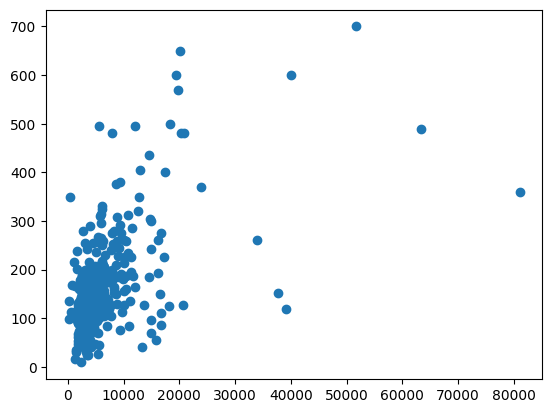

In [179]:
plt.scatter(data['ApplicantIncome'],data['LoanAmount'])

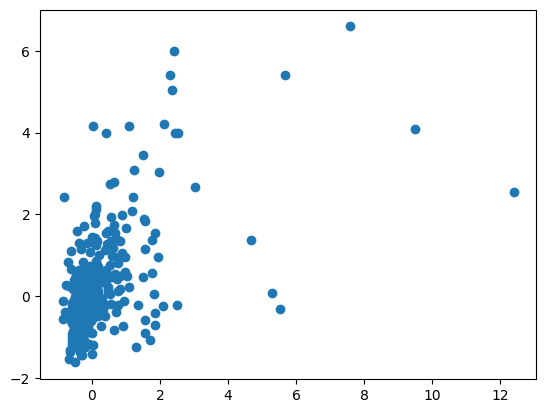

In [180]:
plt.scatter(std_data['ApplicantIncome'],std_data['LoanAmount'])

In [181]:
# Scatter plot is same for normal data and standardized data But Stretching and moving all that is happening.

# Min Max Scaler

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
scaler = MinMaxScaler()

In [184]:
mm_data = scaler.fit_transform(data)
mm_data = pd.DataFrame(mm_data,columns = data.columns)
mm_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI,NewFeature,Seperator
0,1.0,0.0,0.000000,0.0,0.107393,0.070489,0.000000,0.172214,0.74359,0.5,0.285533,1.0,0.741400,0.055394,1.000000,0.036886,0.036886,0.0,NaN,0.0
1,1.0,1.0,0.333333,0.0,0.107393,0.054830,0.036192,0.172214,0.74359,0.5,0.000000,0.0,0.741400,0.058435,1.000000,0.035833,0.035833,1.0,0.126546,1.0
2,1.0,1.0,0.000000,0.0,0.000000,0.035250,0.000000,0.082489,0.74359,0.5,0.285533,1.0,0.992449,0.019583,0.000000,0.017164,0.017164,1.0,0.104508,1.0
3,1.0,1.0,0.000000,1.0,0.107393,0.030093,0.056592,0.160637,0.74359,0.5,0.285533,1.0,0.992449,0.043980,0.834103,0.033424,0.033424,1.0,0.101332,1.0
4,1.0,0.0,0.000000,0.0,0.107393,0.072356,0.000000,0.191027,0.74359,0.5,0.285533,1.0,0.741400,0.057292,1.000000,0.039747,0.039747,1.0,0.144685,1.0


In [185]:
# Now suddenly we see all this weird no.s in data. But in ML when we use any algorithm to predict ( we use these scaling data only)